# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="https://raw.githubusercontent.com/learn-co-curriculum/dsc-monty-hall-problem-lab/master/images/Image_58_MontyHall.png" alt="doors 1, 2, and 3 with two goats and a car">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

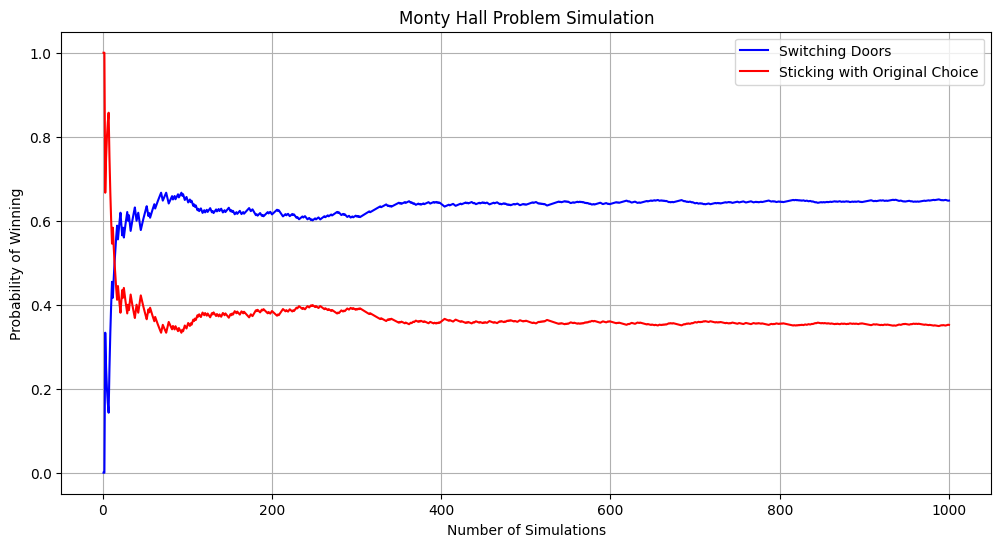

In [1]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

def monty_hall_simulation(num_simulations):
    # Initialize counters for wins
    wins_when_switching = 0
    wins_when_sticking = 0

    # Arrays to store results for plotting
    switch_win_rates = []
    stick_win_rates = []

    for i in range(1, num_simulations + 1):
        # Randomly place the car
        car_door = np.random.randint(1, 4)

        # Contestant makes an initial choice
        initial_choice = np.random.randint(1, 4)

        # Determine which door the host will open
        remaining_doors = [door for door in [1, 2, 3] if door != initial_choice and door != car_door]
        host_opens = np.random.choice(remaining_doors)
        
        # Determine the remaining unopened door (which could be the winning switch choice)
        switch_choice = [door for door in [1, 2, 3] if door != initial_choice and door != host_opens][0]

        # Check if the contestant wins by sticking with the initial choice
        if initial_choice == car_door:
            wins_when_sticking += 1

        # Check if the contestant wins by switching
        if switch_choice == car_door:
            wins_when_switching += 1

        # Calculate the winning rates
        switch_win_rates.append(wins_when_switching / i)
        stick_win_rates.append(wins_when_sticking / i)

    return switch_win_rates, stick_win_rates

# Parameters
num_simulations = 1000

# Run the simulation
switch_win_rates, stick_win_rates = monty_hall_simulation(num_simulations)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_simulations + 1), switch_win_rates, label='Switching Doors', color='blue')
plt.plot(range(1, num_simulations + 1), stick_win_rates, label='Sticking with Original Choice', color='red')
plt.xlabel('Number of Simulations')
plt.ylabel('Probability of Winning')
plt.title('Monty Hall Problem Simulation')
plt.legend()
plt.grid(True)
plt.show()


## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 